##1. Загрузка данных

В этом разделе мы загрузим датасет song_data.csv и проведем первичный анализ, чтобы понять его структуру, проверить наличие пропущенных значений и аномалий.

In [21]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка датасета
df = pd.read_csv('song_data (1).csv')

# Просмотр первых строк датасета
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


##2. Первичный анализ данных

Проверим основные характеристики датасета: количество строк, типы данных, пропущенные значения и базовые статистики.

In [22]:
# Общая информация о датасете
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [23]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
print(df.isnull().sum())



Пропущенные значения:
song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64


In [24]:
# Описательная статистика
print("\nОписательная статистика:")
df.describe()


Описательная статистика:


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


##3. Визуализация данных

Построим несколько визуализаций, чтобы лучше понять распределение целевой переменной (song_popularity) и корреляции между признаками.

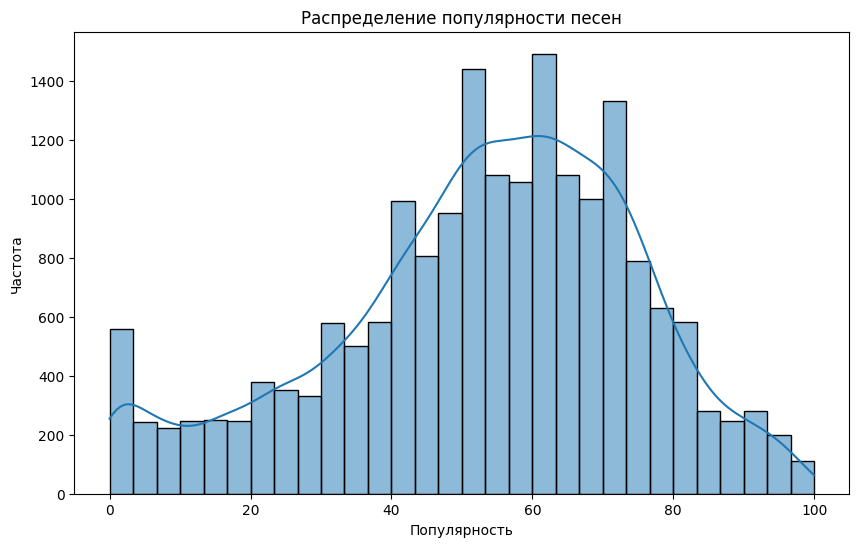

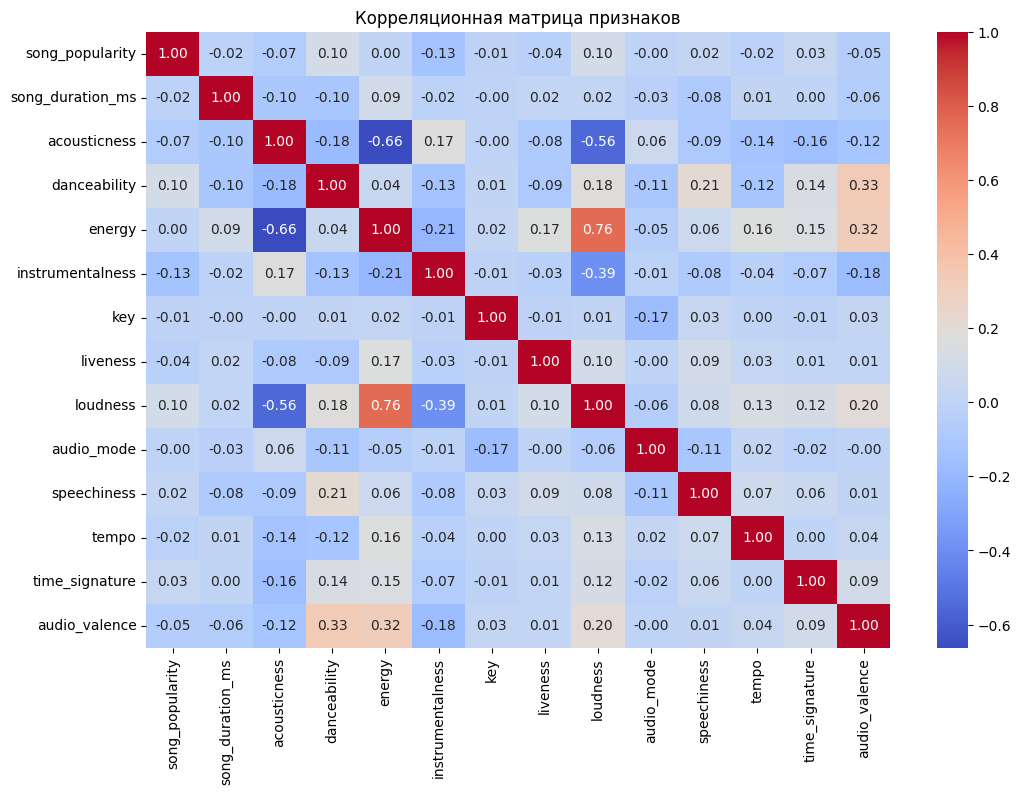

In [25]:
# Распределение целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(df['song_popularity'], bins=30, kde=True)
plt.title('Распределение популярности песен')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('song_name', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

##4. Предобработка данных

Удалим столбец song_name, так как он не нужен для модели регрессии. Также нормализуем числовые признаки, чтобы улучшить производительность моделей.



In [26]:
# Удаление столбца с названием песни
df = df.drop('song_name', axis=1)

# Разделение на признаки и целевую переменную
X = df.drop('song_popularity', axis=1)
y = df['song_popularity']

# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##5. Построение моделей

Мы построим три модели регрессии: линейную регрессию, Ridge и Lasso. Для каждой модели применим K-Fold кросс-валидацию (k=5), чтобы оценить их производительность.

##6. Оценка моделей на тестовой выборке

In [27]:
# Инициализация моделей
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Словарь для хранения результатов кросс-валидации
results = {}

# K-Fold кросс-валидация (k=5)
for name, model in models.items():
    # Оценка MSE
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)

    # Оценка R-squared
    r2_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

    results[name] = {
        'Mean MSE': -mse_scores.mean(),
        'Std MSE': mse_scores.std(),
        'Mean RMSE': rmse_scores.mean(),
        'Std RMSE': rmse_scores.std(),
        'Mean R2': r2_scores.mean(),
        'Std R2': r2_scores.std()
    }
    print(f"{name}:")
    print(f"Mean MSE = {results[name]['Mean MSE']:.2f}, Std MSE = {results[name]['Std MSE']:.2f}")
    print(f"Mean RMSE = {results[name]['Mean RMSE']:.2f}, Std RMSE = {results[name]['Std RMSE']:.2f}")
    print(f"Mean R2 = {results[name]['Mean R2']:.2f}, Std R2 = {results[name]['Std R2']:.2f}\n")

Linear Regression:
Mean MSE = 466.94, Std MSE = 45.16
Mean RMSE = 21.58, Std RMSE = 1.06
Mean R2 = 0.01, Std R2 = 0.03

Ridge Regression:
Mean MSE = 466.94, Std MSE = 45.16
Mean RMSE = 21.58, Std RMSE = 1.06
Mean R2 = 0.01, Std R2 = 0.03

Lasso Regression:
Mean MSE = 470.71, Std MSE = 51.68
Mean RMSE = 21.66, Std RMSE = 1.21
Mean R2 = 0.01, Std R2 = 0.02

Elastic Net:
Mean MSE = 470.54, Std MSE = 51.73
Mean RMSE = 21.66, Std RMSE = 1.21
Mean R2 = 0.01, Std R2 = 0.02

Decision Tree:
Mean MSE = 584.15, Std MSE = 50.04
Mean RMSE = 24.15, Std RMSE = 1.03
Mean R2 = -0.26, Std R2 = 0.26

Random Forest:
Mean MSE = 307.37, Std MSE = 27.10
Mean RMSE = 17.51, Std RMSE = 0.78
Mean R2 = 0.34, Std R2 = 0.11



In [28]:
# Словарь для хранения результатов оценки на тестовой выборке
test_results = {}

# Оценка моделей на тестовой выборке
for name, model in models.items():
    # Обучение модели на обучающей выборке
    model.fit(X_train, y_train)

    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    # Расчет метрик
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    test_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"{name}:")
    print(f"MSE = {test_results[name]['MSE']:.2f}")
    print(f"RMSE = {test_results[name]['RMSE']:.2f}")
    print(f"R2 = {test_results[name]['R2']:.2f}\n")

Linear Regression:
MSE = 461.64
RMSE = 21.49
R2 = 0.04

Ridge Regression:
MSE = 461.64
RMSE = 21.49
R2 = 0.04

Lasso Regression:
MSE = 468.09
RMSE = 21.64
R2 = 0.03

Elastic Net:
MSE = 468.05
RMSE = 21.63
R2 = 0.03

Decision Tree:
MSE = 566.86
RMSE = 23.81
R2 = -0.18

Random Forest:
MSE = 296.07
RMSE = 17.21
R2 = 0.39



##7.Выводы

На основе результатов кросс-валидации и оценки на тестовой выборке можно сделать следующие выводы:

* **Random Forest** показал наилучшие результаты среди всех моделей, с наименьшим MSE и RMSE, и наибольшим R2 как на кросс-валидации, так и на тестовой выборке. Это указывает на то, что случайный лес лучше всего подходит для прогнозирования популярности песен на данном датасете.
* **Linear Regression, Ridge и Lasso** показали схожие результаты, но их производительность значительно хуже, чем у Random Forest. Это может говорить о том, что взаимосвязь между признаками и популярностью песен не является строго линейной.
* **Decision Tree** показал худшие результаты, что может быть связано с его склонностью к переобучению на тренировочных данных.

Таким образом, **Random Forest** является наиболее подходящей моделью для данной задачи.


In [29]:
# Вывод лучшей модели по Mean RMSE
best_model = min(results, key=lambda x: results[x]['Mean RMSE'])
print(f"\nЛучшая модель: {best_model}")
print(f"Mean RMSE: {results[best_model]['Mean RMSE']:.2f}")
print(f"Mean MSE: {results[best_model]['Mean MSE']:.2f}")
print(f"R² на тестовой выборке: {r2_score(y_test, models[best_model].predict(X_test)):.2f}")


Лучшая модель: Random Forest
Mean RMSE: 17.51
Mean MSE: 307.37
R² на тестовой выборке: 0.39
